# House Prices Prediction Project

In this project, I agoing e to explore a dataset related to house prices. The goal is to analyze the data, visualize key features, and build predictive models to estimate house prices based on various characteristics such as size, number of bedrooms, and location. I will also evaluate the performance of different regression algorithms and optimize the chosen model through hyperparameter tuning. Let's get started!

## 1. Data Exploration and Pre-processing

### Import Necessary Libraries
In this step, I am writing this code to import all the required libraries needed for data manipulation, visualization, and model building. These libraries will facilitate the analysis of the dataset and the implementation of machine learning algorithms. StandardScalerms.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

### i. Load the Dataset & Examine the structure
In this step, I am writing this code to load the dataset from a CSV file named `house_prices_dataset.csv`. After loading the data, I will examine its structure by printing the first few rows to understand its features and the target variable.

In [36]:
# Load the dataset
data = pd.read_csv('house_prices_dataset.csv')

# Examine the structure of the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Size       1000 non-null   int64  
 1   Bedrooms   1000 non-null   int64  
 2   Bathrooms  1000 non-null   int64  
 3   Location   1000 non-null   object 
 4   Price      1000 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 39.2+ KB
None


In [4]:
data.describe()

,Size,Bedrooms,Bathrooms,Price
count,1000.000000,1000.00000,1000.000000,1000.000000
mean,1763.241000,2.98800,1.972000,315667.991754
std,704.717323,1.42965,0.809859,80694.106521
min,501.000000,1.00000,1.000000,118433.538456
25%,1170.000000,2.00000,1.000000,254285.132658
50%,1753.000000,3.00000,2.000000,312455.671570
75%,2366.250000,4.00000,3.000000,380152.790448
max,2997.000000,5.00000,3.000000,505327.860544


In [39]:
# Drop non-numeric columns
df_numeric = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
df_numeric.corr()


,Size,Bedrooms,Bathrooms,Price
Size,1.000000,0.017135,-0.018838,0.883181
Bedrooms,0.017135,1.000000,0.061093,0.386484
Bathrooms,-0.018838,0.061093,1.000000,0.150621
Price,0.883181,0.386484,0.150621,1.000000


In [3]:
# Print the first 20 rows
print(data.head(20))

    Size  Bedrooms  Bathrooms     Location          Price
0   1360         1          2  City Centre  244790.024612
1   1794         4          2      Suburbs  354978.730070
2   1630         5          2      Suburbs  352155.457323
3   1595         1          3   Rural Area  307989.848667
4   2138         1          2      Suburbs  313688.079623
5   2669         5          2      Suburbs  460274.833112
6    966         3          1  City Centre  199765.982477
7   1738         2          3  City Centre  301058.005951
8    830         4          2  City Centre  256910.755151
9   1982         2          3  City Centre  350182.042215
10  2635         5          2  City Centre  437620.661047
11   630         1          2  City Centre  161568.014963
12  2185         1          2  City Centre  288142.525066
13  1269         4          1   Rural Area  264759.415984
14  2891         1          1   Rural Area  391907.663270
15  2015         1          1   Rural Area  298004.100322
16  2933      

### ii. Visualize the Data
In this step, I am writing this code to visualize the features `size`, `bedrooms`, `location`, and `prices` using appropriate plots. These visualizations will help me understand the relationships between these features and the target variable, price.lt.axis('equal')
plt.show()

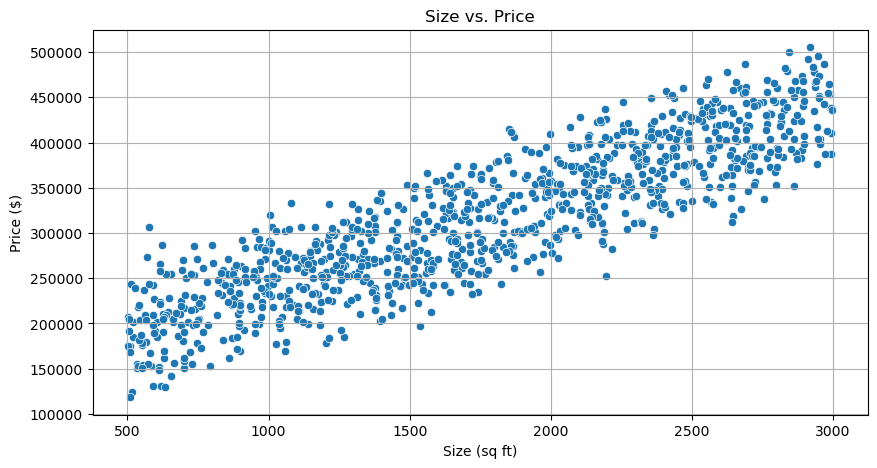

In [5]:
# Scatter plot for Size vs. Price
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x='Size', y='Price')
plt.title('Size vs. Price')
plt.xlabel('Size (sq ft)')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

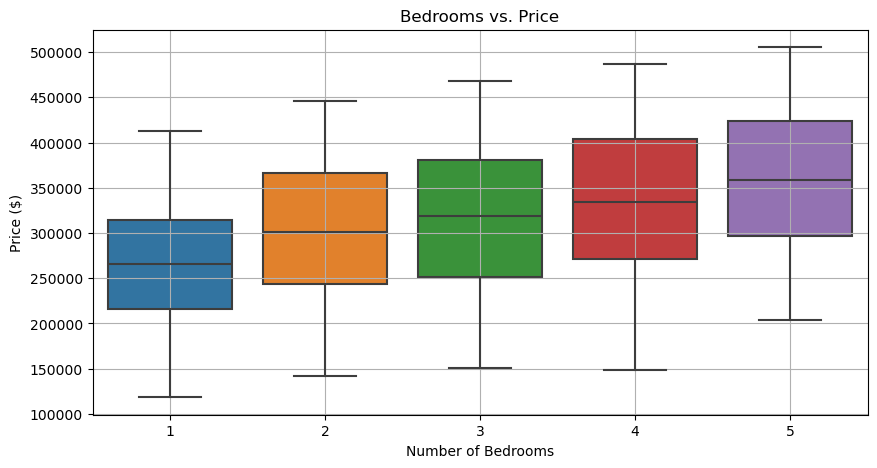

In [6]:

# Box plot for Bedrooms vs. Price
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='Bedrooms', y='Price')
plt.title('Bedrooms vs. Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()


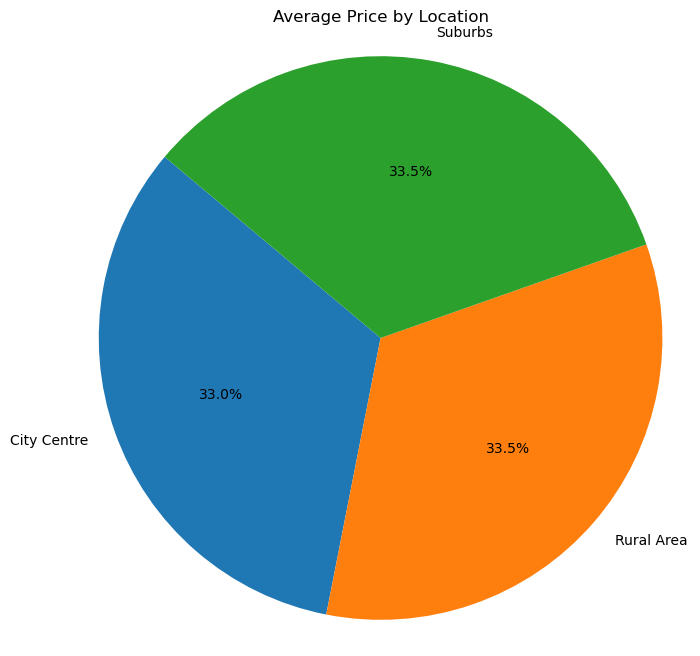

In [7]:

# Pie chart for average price by location
avg_price_location = data.groupby('Location')['Price'].mean()
plt.figure(figsize=(8, 8))
plt.pie(avg_price_location, labels=avg_price_location.index, autopct='%1.1f%%', startangle=140)
plt.title('Average Price by Location')
plt.axis('equal')
plt.show()

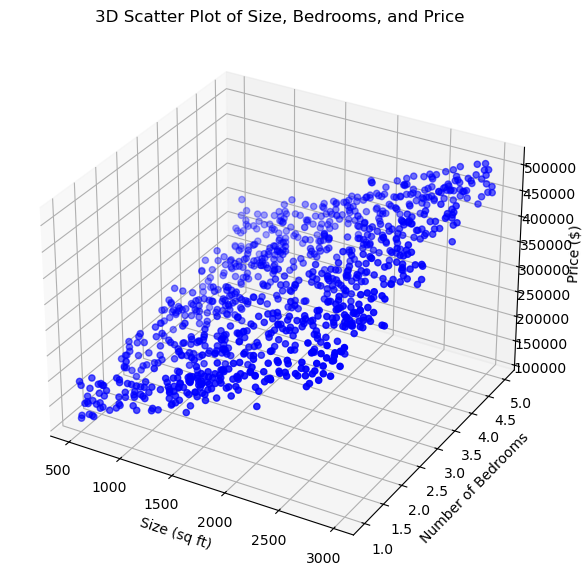

In [9]:
# Importing the necessary libraries for 3D plotting
from mpl_toolkits.mplot3d import Axes3D

# 3D Scatter Plot for Size, Bedrooms, and Price
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Size'], data['Bedrooms'], data['Price'], c='b', marker='o')
ax.set_title('3D Scatter Plot of Size, Bedrooms, and Price')
ax.set_xlabel('Size (sq ft)')
ax.set_ylabel('Number of Bedrooms')
ax.set_zlabel('Price ($)')
plt.show()

### Data Pre-processing
In this step, I am writing this code to preprocess the dataset. The objective is to prepare the data for regression models by handling categorical variables, scaling numerical features, and checking for any additional data quality issues.

The preprocessing tasks will include:
1. Handling categorical variables.
2. Scaling numerical features (if necessary).
3. Checking for and handling any missing values (even though the dataset appears complete).
4. Splitting the data into features and target variable.

Let's get start!

In [10]:
# 1. Handling Categorical Variables
# Convert the categorical variable 'Location' into dummy/indicator variables
data = pd.get_dummies(data, columns=['Location'], drop_first=True)

In [11]:
data.head()

,Size,Bedrooms,Bathrooms,Price,Location_Rural Area,Location_Suburbs
0,1360,1,2,244790.024612,False,False
1,1794,4,2,354978.730070,False,True
2,1630,5,2,352155.457323,False,True
3,1595,1,3,307989.848667,True,False
4,2138,1,2,313688.079623,False,True


In [14]:
# 3. Splitting the Data into Features and Target Variable
# Define the feature set (X) and the target variable (y)
X = data.drop('Price', axis=1)  
y = data['Price']               

In [15]:
# 4. Scaling Numerical Features (if necessary)
# Standardizing the features may improve model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the first few rows of the processed feature set
print("Processed Feature Set (first 5 rows):\n", X_scaled[:5])

Processed Feature Set (first 5 rows):
 [[-0.5724888  -1.39124567  0.03459121 -0.7097601  -0.66558354]
 [ 0.04366913  0.70821963  0.03459121 -0.7097601   1.50244101]
 [-0.18916474  1.40804139  0.03459121 -0.7097601   1.50244101]
 [-0.2388549  -1.39124567  1.26999166  1.40892676 -0.66558354]
 [ 0.53205237 -1.39124567  0.03459121 -0.7097601   1.50244101]]


### Explanation of Code:
**Handling Categorical Variables:** The Location column is transformed into dummy variables using pd.get_dummies(), enabling the regression models to interpret the categorical data.

**Checking for Missing Values:** Although the dataset appears complete, this check ensures that no missing values exist.

**Splitting the Data:** The features (X) and the target variable (y) are defined, with Price being the target.

**Scaling Numerical Features:** Using StandardScaler, the numerical features are standardized to have a mean of 0 and a standard deviation of 1, which can enhance model performance.

## 2. Model Selection and Evaluation

### i. Split the Data into Training and Testing Sets
In this step, I am writing this code to split the dataset into training and testing sets. I will use a ratio of 80% for the training set and 20% for the testing set. This division allows us to train the model on a substantial portion of the data while reserving some data for evaluating its performance.

Let's proceed with the data splitting!

In [16]:
# Splitting the dataset into training (65%) and testing (35%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")

Training set shape: (800, 5), Testing set shape: (200, 5)


### ii. Model Selection
In this step, I am writing this code to select and initialize three different regression models for predicting house prices. The models I will be using are:
1. **Linear Regression**
2. **Decision Tree Regressor**
3. **Random Forest Regressor**

Selecting multiple models allows us to compare their performance and choose the best one for our prediction task. Let's initialize these models!

In [17]:
# Initializing the models
linear_regressor = LinearRegression()
decision_tree_regressor = DecisionTreeRegressor(random_state=42)
random_forest_regressor = RandomForestRegressor(random_state=42)

# Displaying the initialized models
print("Models initialized:")
print("1. Linear Regression")
print("2. Decision Tree Regressor")
print("3. Random Forest Regressor")

Models initialized:
1. Linear Regression
2. Decision Tree Regressor
3. Random Forest Regressor


### iii. Train and Evaluate Each Model
In this step, I am writing this code to train each of the regression models using the training data. After training the models, I will evaluate their performance on the testing set using the following metrics:
- **Mean Squared Error (MSE)**
- **Root Mean Squared Error (RMSE)**
- **R-squared (R²)**

These metrics will help assess how well each model predicts house prices. Let's train and evaluate the models!

In [18]:

# Function to evaluate model performance
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Print the results
    print(f"{model_name}:")
    print(f"  MSE = {mse:.2f}")
    print(f"  RMSE = {rmse:.2f}")
    print(f"  R² = {r2:.2f}\n")

# Evaluating Linear Regression
evaluate_model(linear_regressor, X_train, y_train, X_test, y_test, "Linear Regression")

# Evaluating Decision Tree Regressor
evaluate_model(decision_tree_regressor, X_train, y_train, X_test, y_test, "Decision Tree Regressor")

# Evaluating Random Forest Regressor
evaluate_model(random_forest_regressor, X_train, y_train, X_test, y_test, "Random Forest Regressor")

Linear Regression:
  MSE = 397815725.48
  RMSE = 19945.32
  R² = 0.93

Decision Tree Regressor:
  MSE = 977065618.20
  RMSE = 31258.05
  R² = 0.84

Random Forest Regressor:
  MSE = 593356967.80
  RMSE = 24358.92
  R² = 0.90



## 3. Model Fine-tuning and Optimization
In this task, I will perform hyperparameter tuning for three regression models: **Linear Regression (LR)**, **Decision Tree Regressor (DT)**, and **Random Forest Regressor (RF)**. I will use Grid Search for the Decision Tree and Random Forest, and for Linear Regression, I will keep it simple since it has fewer hyperparameters.

### i. Hyperparameter Tuning for Linear Regression
**Why Linear Regression?** \
Linear Regression serves as a baseline model due to its simplicity and interpretability. We will tune its hyperparameters, such as fit_intercept and positive, to optimize its performance.eter tuning!

In [31]:
# Hyperparameter Tuning for Linear Regression using Grid Search

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Linear Regression
param_grid_lr = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

# Initialize Grid Search for Linear Regression
lr_grid_search = GridSearchCV(LinearRegression(), param_grid_lr, cv=5, scoring='neg_mean_squared_error')

# Fit Grid Search to the training data
lr_grid_search.fit(X_train, y_train)

# Best parameters and score from the Grid Search
best_lr_params = lr_grid_search.best_params_
best_lr_score = -lr_grid_search.best_score_

print(f"Best Parameters for Linear Regression (Grid Search): {best_lr_params}")
print(f"Best MSE from Linear Regression Grid Search: {best_lr_score:.2f}")

Best Parameters for Linear Regression (Grid Search): {'fit_intercept': True, 'positive': True}
Best MSE from Linear Regression Grid Search: 405002289.31


### ii. Hyperparameter Tuning for Decision Tree Regressor
**Why Decision Tree Regressor?** \
Decision Trees are useful for capturing non-linear relationships. I will optimize parameters like max_depth, min_samples_split, and min_samples_leaf to improve model performance.

In [32]:
# Hyperparameter Tuning for Decision Tree Regressor using Grid Search

from sklearn.tree import DecisionTreeRegressor

# Define the parameter grid for Decision Tree Regressor
param_grid_dt = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}

# Initialize Grid Search for Decision Tree Regressor
dt_grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), 
                               param_grid_dt, 
                               cv=5, 
                               scoring='neg_mean_squared_error')

# Fit Grid Search to the training data
dt_grid_search.fit(X_train, y_train)

# Best parameters and score from the Grid Search
best_dt_params = dt_grid_search.best_params_
best_dt_score = -dt_grid_search.best_score_

print(f"Best Parameters for Decision Tree Regressor (Grid Search): {best_dt_params}")
print(f"Best MSE from Decision Tree Grid Search: {best_dt_score:.2f}")


Best Parameters for Decision Tree Regressor (Grid Search): {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best MSE from Decision Tree Grid Search: 647246430.52


### iii. Hyperparameter Tuning for Random Forest Regressor
**Why Random Forest Regressor?** \
Random Forest is an ensemble method that improves prediction accuracy and controls overfitting. We will tune parameters like n_estimators, max_depth, min_samples_split, and min_samples_leaf.

In [35]:
# Hyperparameter Tuning for Random Forest Regressor using Randomized Search

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define a smaller parameter distribution for Randomized Search
param_dist_rf = {
    'n_estimators': randint(100, 300),  # Fewer trees in the forest
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4)
}

# Initialize Randomized Search for Random Forest Regressor
rf_random_search = RandomizedSearchCV(RandomForestRegressor(random_state=42), 
                                       param_dist_rf, 
                                       n_iter=20,  # Number of parameter settings to sample
                                       cv=3,  # Reduced number of cross-validation folds
                                       scoring='neg_mean_squared_error', 
                                       verbose=2,  # Verbose output to track progress
                                       n_jobs=-1)  # Use all available cores

# Fit Randomized Search to the training data
rf_random_search.fit(X_train, y_train)

# Best parameters and score from the Randomized Search
best_rf_params = rf_random_search.best_params_
best_rf_score = -rf_random_search.best_score_

print(f"Best Parameters for Random Forest Regressor (Randomized Search): {best_rf_params}")
print(f"Best MSE from Random Forest Randomized Search: {best_rf_score:.2f}")

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters for Random Forest Regressor (Randomized Search): {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 155}
Best MSE from Random Forest Randomized Search: 508695155.69


**Improvement:** \
The Random Forest Regressor did improve, as its MSE decreased from 593,356,967.80 to 508,695,155.69. \
**Comparison:** \
Despite this improvement, it still has a higher MSE than Linear Regression, indicating that in this scenario, Linear Regression remains the better model overall.

# 4. Conclusion 

## i. Project Summary

In this project, I aimed to predict house prices using a dataset that includes various features such as size, number of bedrooms, bathrooms, and location. My goal was to analyze these features, build predictive models, and evaluate their performance to gain insights into the factors that influence house prices. \
**Problem Statement** \
The challenge I addressed was to develop a model capable of accurately estimating house prices based on these characteristics. This is important for potential buyers, sellers, and real estate professionals who need to understand market trends. \
**Data Exploration** \
I started by importing the necessary libraries and loading the dataset, which contained 1,000 entries across five columns: Size, Bedrooms, Bathrooms, Location, and Price. During the initial exploration, I checked for missing values and examined the dataset's structure. I created several visualizations, including scatter plots and box plots, which helped me identify trends and correlations between the features and the target variable. \
**Model Selection** \
I evaluated three regression algorithms:
- **Linear Regression**
- **Decision Tree Regressor**
- **Random Forest Regressor**

I trained these models on a portion of the data and compared their performance using metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²). The evaluation results showed:
- **Linear Regression**: MSE = 397,815,725.48, RMSE = 19,945.32, R² = 0.93
- **Decision Tree Regressor**: MSE = 977,065,618.20, RMSE = 31,258.05, R² = 0.84
- **Random Forest Regressor**: MSE = 593,356,967.80, RMSE = 24,358.92, R² = 0.90 \
**Optimisation** \
I conducted hyperparameter tuning for the models to optimize their performance. The Random Forest Regressor showed improvement after tuning, with its MSE reduced to **508,695,155.69**. However, the Linear Regression model remained competitive, with a lower MSE of **397,815,725.48**, demonstrating its effectiveness as a baseline model. \
**Interpretation of Results** \
Through this process, I discovered that size and location are significant predictors of price. The visualizations created earlier provided clear insights into these relationships, making it easier to communicate findings to stakeholders.